In [8]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_csv('titanic-dataset.csv', usecols=['Age', 'Fare', 'Survived'])

In [10]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Vinay kumar\AppData\Local\Temp\ipykernel_12392\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [13]:
# Feature and target selection
X = df.iloc[:, 1:3]  # Select columns 1 and 2 (e.g., 'Age' and 'Fare')
y = df.iloc[:, 0]    # Select column 0 (e.g., 'Survived')

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Vinay kumar\AppData\Local\Temp\ipykernel_12392\3046224368.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])  # Probability density function


Text(0.5, 1.0, 'Age QQ Plot')

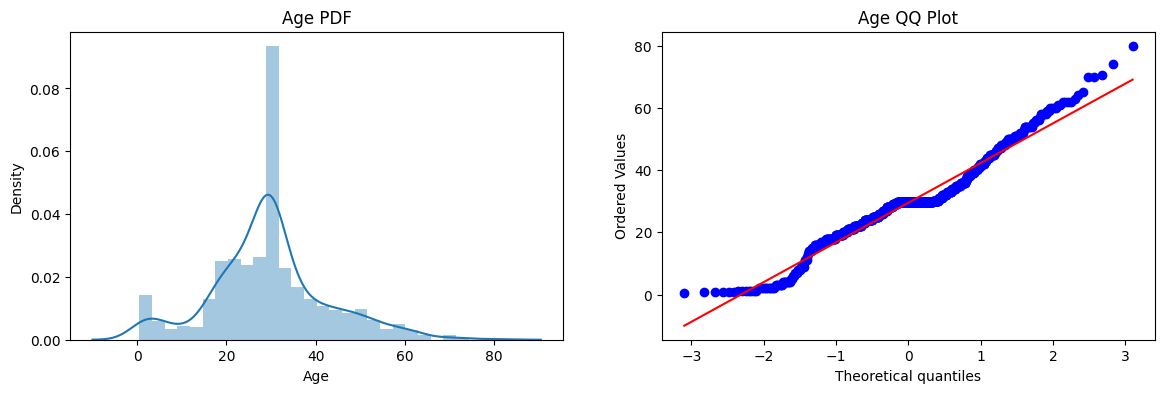

In [15]:
# Distribution and normality plots for 'Age'
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.distplot(X_train['Age'])  # Probability density function
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)  # QQ plot
plt.title('Age QQ Plot')

C:\Users\Vinay kumar\AppData\Local\Temp\ipykernel_12392\2006164638.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


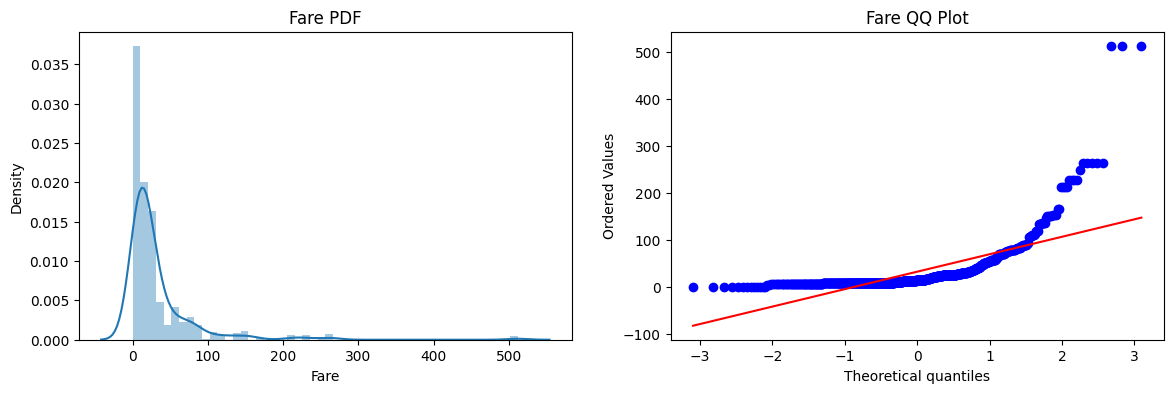

In [16]:
plt.figure(figsize=(14, 4))

# PDF plot for 'Fare'
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

# QQ plot for 'Fare'
plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [19]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [20]:
# Apply log transformation to features
trf = FunctionTransformer(func=np.log1p)

In [21]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [22]:
# Initialize classifiers
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Train models
clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

# Predict on transformed test data
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

# Evaluate accuracy
print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.664804469273743


In [23]:
# Apply log transformation to full feature set
X_transformed = trf.fit_transform(X)

# Initialize classifiers
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Evaluate using 10-fold cross-validation
print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.655505617977528


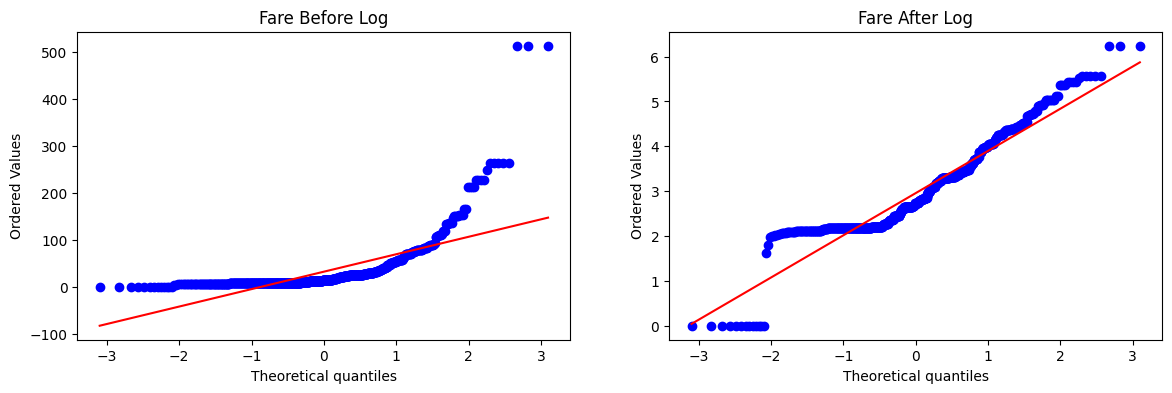

In [24]:
plt.figure(figsize=(14, 4))

# QQ plot before log transformation
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

# QQ plot after log transformation
plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

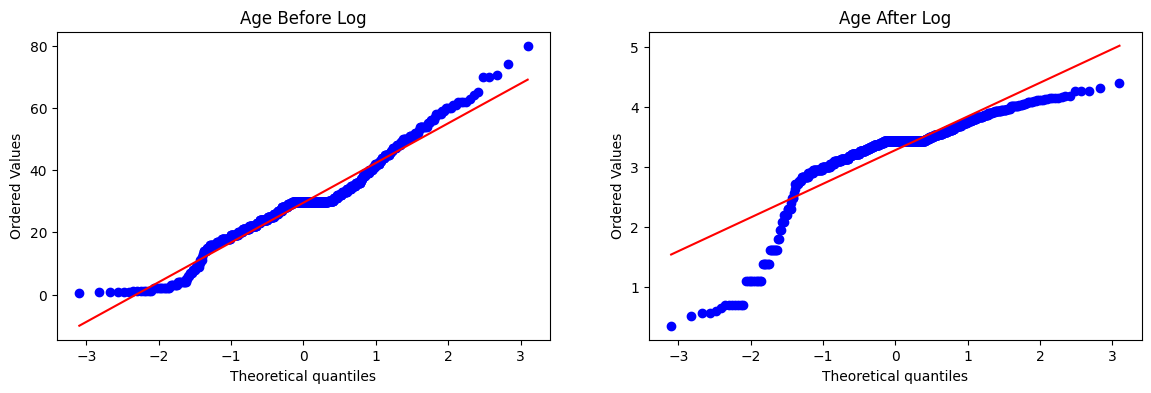

In [25]:
plt.figure(figsize=(14, 4))

# QQ plot before log transformation
plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

# QQ plot after log transformation
plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [26]:
# Apply log transformation to 'Fare' column only
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')

# Transform training and test sets
X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [27]:
# Initialize classifiers
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Train models
clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

# Predict on transformed test data
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

# Evaluate accuracy
print("Accuracy LR", accuracy_score(y_test, y_pred))
print("Accuracy DT", accuracy_score(y_test, y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [28]:
# Apply log transformation to 'Fare' column only
X_transformed2 = trf2.fit_transform(X)

# Initialize classifiers
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

# Evaluate using 10-fold cross-validation
print("LR", np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6554681647940075


In [29]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]  # Select 'Age' and 'Fare'
    y = df.iloc[:, 0]    # Select 'Survived'

    # Apply transformation to 'Fare' only
    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    X_trans = trf.fit_transform(X)

    # Initialize and evaluate Logistic Regression
    clf = LogisticRegression()
    print("Accuracy", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    # Visualize QQ plots before and after transformation
    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6645193508114856


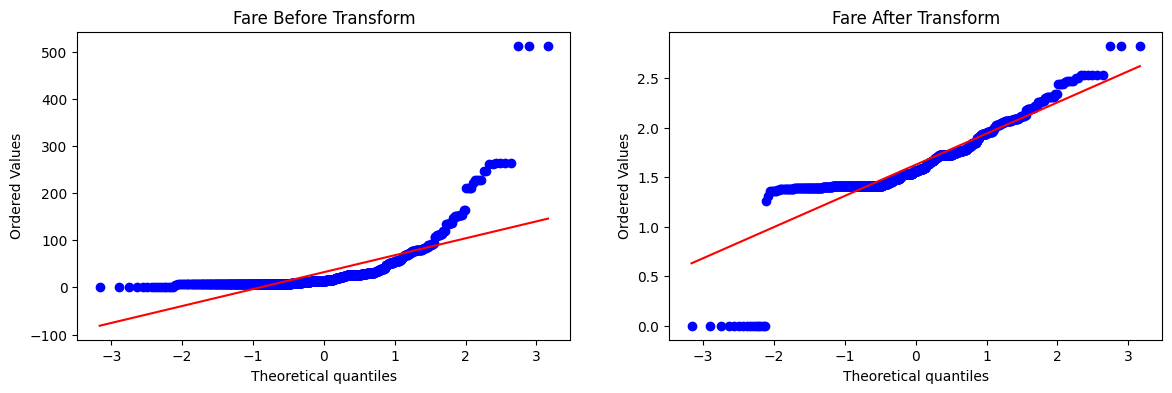

In [52]:
# No transform
apply_transform(lambda x:x**(1/6))

Accuracy 0.6712609238451936


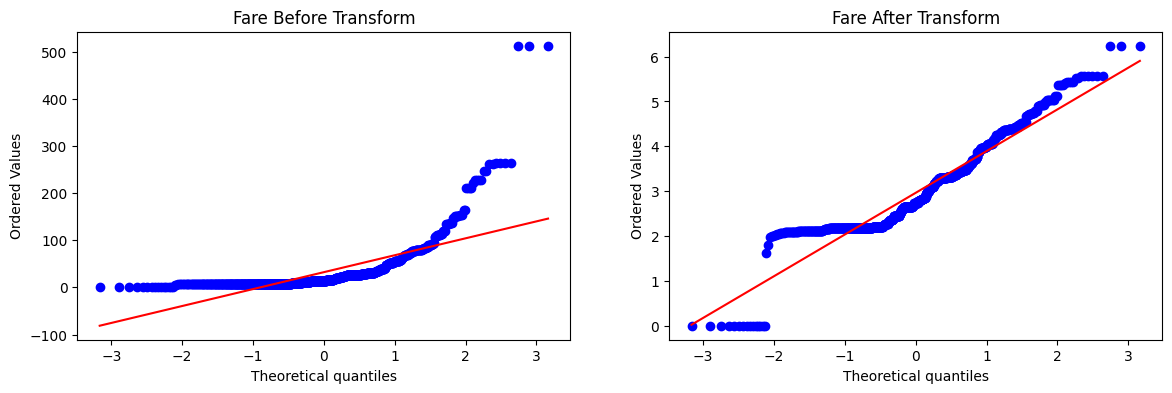

In [53]:
apply_transform(np.log1p)